In [50]:

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [63]:

ticker = 'INFY'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']
data.head()

,INFY
Date,
2010-01-04,5.487742
2010-01-05,5.509014
2010-01-06,5.424899
2010-01-07,5.259570
2010-01-08,5.273107


In [64]:
data['INFY'].dtype

dtype('float64')

In [62]:
data.isna().sum()

INFY    0
dtype: int64

In [55]:
log_returns = np.log(1+data.pct_change())
log_returns.head()

,INFY
Date,
2010-01-04,NaN
2010-01-05,0.003869
2010-01-06,-0.015386
2010-01-07,-0.030950
2010-01-08,0.002570


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

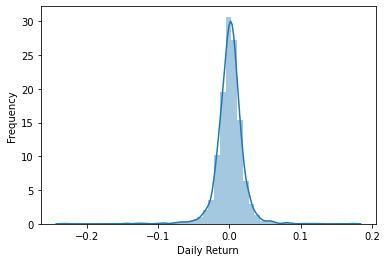

In [ ]:
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

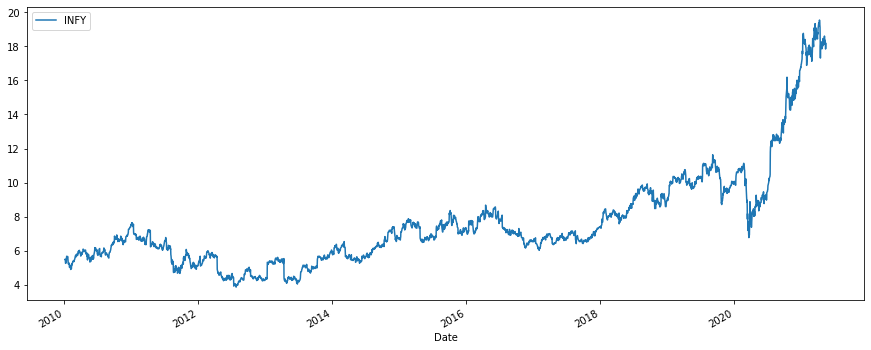

In [ ]:

data.plot(figsize=(15,6))

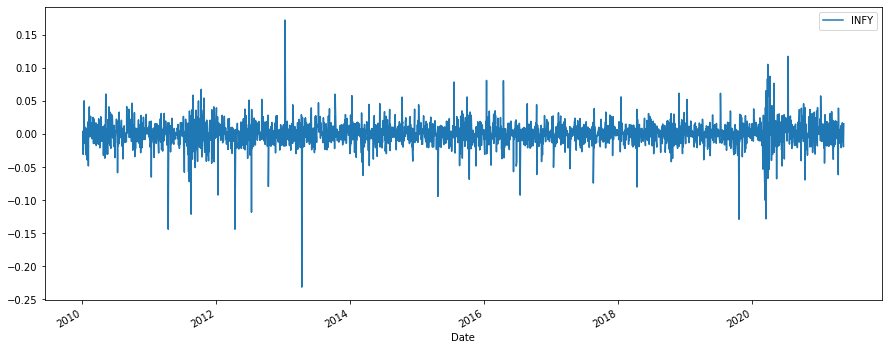

In [ ]:
log_returns.plot(figsize=(15,6))


In [ ]:
u = log_returns.mean()
var = log_returns.var()


In [ ]:
drift = u - (0.09*var)
drift

INFY    0.000386
dtype: float64

In [ ]:
x = np.random.rand(10,2)
x

array([[0.03741926, 0.48470094],
       [0.35115166, 0.55451196],
       [0.65760112, 0.13700615],
       [0.13672996, 0.08214306],
       [0.32719188, 0.98382358],
       [0.26958801, 0.04534133],
       [0.41630017, 0.57214349],
       [0.66483576, 0.60133392],
       [0.25625265, 0.90932235],
       [0.18588712, 0.78173856]])

In [ ]:
norm.ppf(x)

array([[-1.78145275, -0.03835846],
       [-0.38221308,  0.13706923],
       [ 0.40592494, -1.0938693 ],
       [-1.09512945, -1.39079991],
       [-0.44768054,  2.14002375],
       [-0.6140595 , -1.69180767],
       [-0.21136773,  0.18183397],
       [ 0.42569723,  0.25680131],
       [-0.6549417 ,  1.3365937 ],
       [-0.89315486,  0.77807827]])

In [ ]:
stddev = log_returns.std()


In [ ]:

Z = norm.ppf(np.random.rand(50,10000))
Z

array([[-0.51617362, -0.22693042,  0.61603368, ...,  0.70884833,
        -1.54119277,  0.06731252],
       [-1.09585505,  0.58815933,  0.76567465, ...,  0.2733028 ,
         0.69139312, -1.86818462],
       [ 1.17889236, -0.46654729, -1.01204867, ...,  0.13521621,
        -1.65917541, -0.60530189],
       ...,
       [-0.08024703,  0.78939073, -1.13168268, ..., -1.31480678,
         0.90482654, -0.77196659],
       [-0.48350061,  0.92678083,  0.39995009, ...,  1.42899715,
        -1.46672034,  0.82536777],
       [ 0.88984413, -0.64808849, -0.32097289, ..., -1.67646383,
        -0.99773171, -0.00745166]])

In [ ]:

t_intervals = 1000
iterations = 10

In [ ]:
daily_returns= np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(50,1000)))


In [ ]:
daily_returns


array([[0.97670321, 0.99029476, 1.01528496, ..., 1.00507371, 1.00767581,
        1.03451824],
       [0.99778304, 0.99611707, 0.97650291, ..., 1.02121362, 1.00254273,
        1.0214279 ],
       [0.98886029, 0.98733746, 1.01575808, ..., 0.99902575, 1.02074288,
        0.99215946],
       ...,
       [1.0335804 , 1.01217653, 1.02292851, ..., 1.01278991, 0.99349124,
        1.0234334 ],
       [0.9931995 , 0.99564823, 0.98436593, ..., 0.9731875 , 1.01562895,
        0.9871745 ],
       [0.95864228, 0.98515978, 1.02731723, ..., 0.99861349, 0.9790741 ,
        1.01076716]])

In [ ]:

S0 = data.iloc[-1] #It will show the last update price of Amazon Share which is on Friday 14 May
S0

INFY    18.16
Name: 2021-05-14 00:00:00, dtype: float64

In [ ]:
price_list = np.zeros_like(daily_returns)


In [ ]:

price_list.shape


(50, 1000)

In [ ]:
price_list[0] = S0
price_list


array([[18.15999985, 18.15999985, 18.15999985, ..., 18.15999985,
        18.15999985, 18.15999985],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
for t in range(1,50):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [ ]:

price_list.shape

(50, 1000)

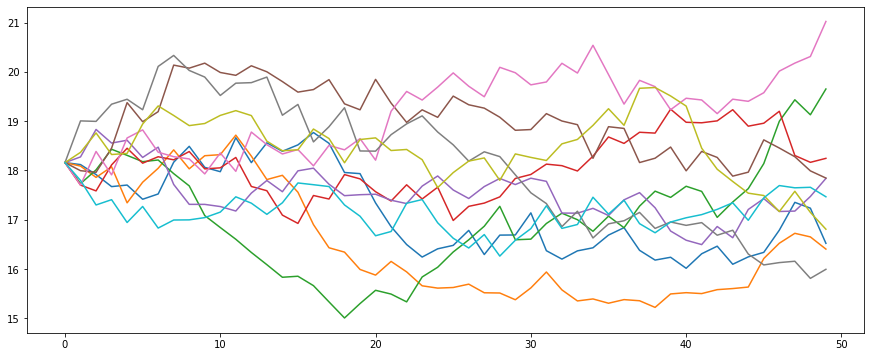

In [ ]:

plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_list).iloc[:,0:10])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price after 50 days')

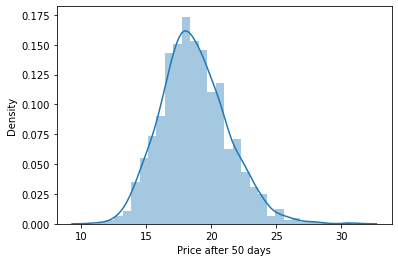

In [ ]:
sns.distplot(pd.DataFrame(price_list).iloc[-1])
plt.xlabel("Price after 50 days")

#SIMPLE RETURNS

In [ ]:
#log_returns = np.log(df1.pct_change())
#log_returns.head(50)
simple_returns=((data/data.shift(1))-1)
simple_returns.head(15)


,INFY
Date,
2010-01-04,NaN
2010-01-05,0.003876
2010-01-06,-0.015269
2010-01-07,-0.030476
2010-01-08,0.002574
2010-01-11,0.005317
2010-01-12,0.051432
2010-01-13,0.015785
2010-01-14,0.003245


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'perf_data.time')

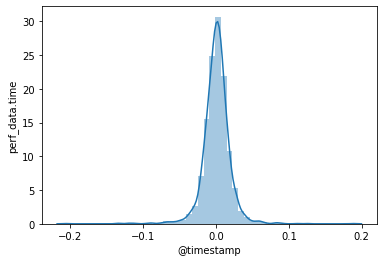

In [ ]:
sns.distplot(simple_returns.iloc[1:])
plt.xlabel("@timestamp")
plt.ylabel("perf_data.time")

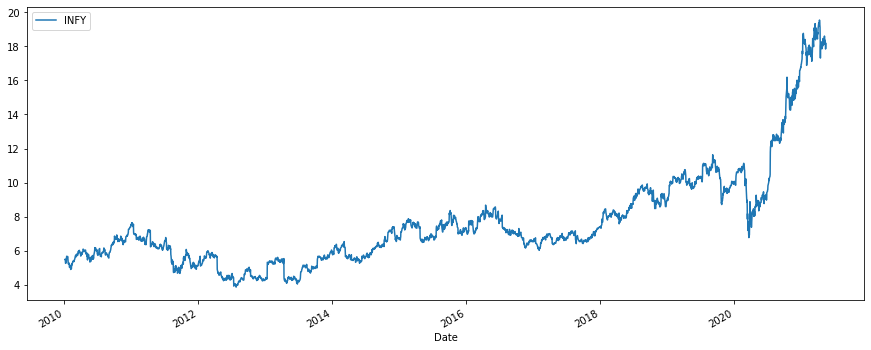

In [ ]:
data.plot(figsize=(15,6))


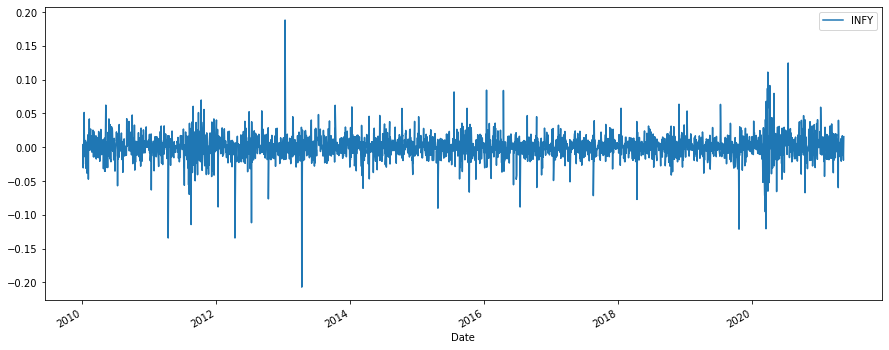

In [ ]:
simple_returns.plot(figsize=(15,6)) #WE are getting descrete graph as timestamp between them was missing


In [ ]:
u = simple_returns.mean()
var = simple_returns.var()

In [ ]:
drift = u - (0.5*var)
drift

INFY    0.00042
dtype: float64

In [ ]:
x = np.random.rand(10,2)
x

array([[0.96477406, 0.81150878],
       [0.9929958 , 0.30455092],
       [0.56597995, 0.94745229],
       [0.11199723, 0.27683261],
       [0.4446268 , 0.34189605],
       [0.70563544, 0.49242623],
       [0.37475687, 0.89775104],
       [0.38037135, 0.59755151],
       [0.27935202, 0.84266125],
       [0.71866519, 0.79520513]])

In [ ]:
norm.ppf(x)

array([[ 1.80899441,  0.88346989],
       [ 2.45704792, -0.51135594],
       [ 0.16614849,  1.62063743],
       [-1.21597496, -0.59227683],
       [-0.13924873, -0.40729395],
       [ 0.54067863, -0.01898576],
       [-0.3192806 ,  1.26884063],
       [-0.30450563,  0.24701453],
       [-0.58476752,  1.00545564],
       [ 0.57888078,  0.8246158 ]])

In [ ]:
stddev = simple_returns.std()


In [ ]:
Z = norm.ppf(np.random.rand(50,10000))
Z

array([[-0.07381143, -0.07975684, -0.34256366, ..., -1.49564736,
         0.94877583,  0.39228226],
       [-0.19988387, -1.35157156,  1.95002195, ..., -0.53147344,
         0.02332891, -0.39179893],
       [ 0.03085878, -0.98178653,  0.98699368, ..., -0.16030831,
        -1.02006448,  0.98543326],
       ...,
       [ 0.37237003,  0.65931732,  0.46271189, ..., -0.05309793,
         1.6638294 ,  1.59282086],
       [ 1.05415015,  2.53516379,  0.8946228 , ...,  1.36917603,
        -0.96364315, -0.16732874],
       [ 0.60904526,  0.36038544, -1.13862253, ..., -1.21290928,
         0.06966147,  2.27515951]])

In [ ]:
t_intervals = 1000
iterations = 10
daily_returns= np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(50,1000)))
daily_returns

array([[1.04831503, 1.02838502, 0.99414154, ..., 1.00432648, 0.9853335 ,
        1.01718828],
       [0.98535747, 1.00082971, 1.00236667, ..., 1.01566446, 0.9943681 ,
        1.00197403],
       [1.02007398, 0.98934289, 1.01027255, ..., 1.01754172, 1.029262  ,
        0.97367396],
       ...,
       [0.98400918, 0.99279997, 1.02418456, ..., 0.99778126, 0.99943755,
        0.96160232],
       [1.05213102, 0.99405772, 0.98877487, ..., 0.97598191, 1.00662578,
        0.97008679],
       [1.03190066, 1.01820066, 0.97763208, ..., 0.98627613, 0.97671697,
        1.01078105]])

In [ ]:
price_list = np.zeros_like(values)
price_list.shape

(50, 1000)

In [ ]:
for t in range(1,50):
    price_list[t] = price_list[t-1]*values[t]

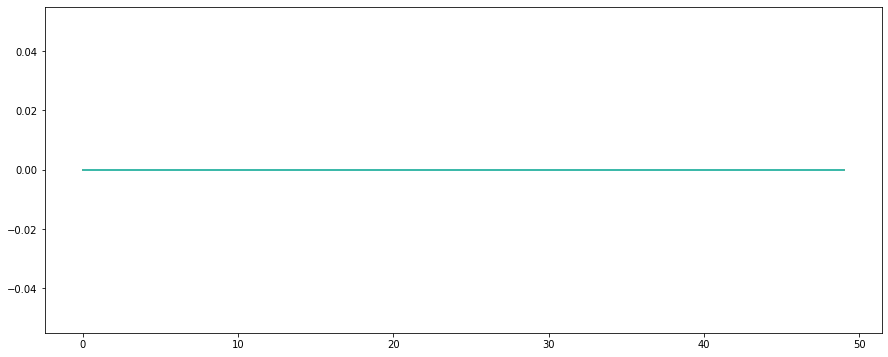

In [59]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_list).iloc[:,0:10])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Values of next 50 steps')

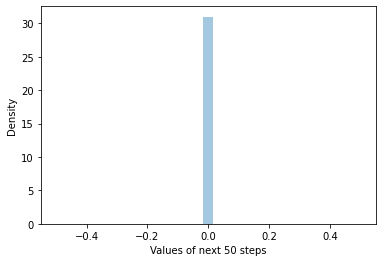

In [ ]:
sns.distplot(pd.DataFrame(price_list).iloc[-1])
plt.xlabel("Values of next 50 steps")